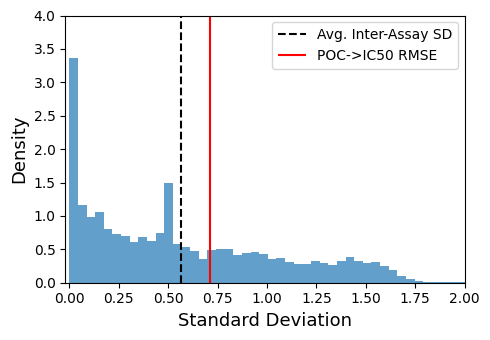

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas as pd 

groups = pd.read_csv("replicate_data.csv").groupby(["canonical_smiles", "uniprot_id"])
stds = [g["pactivity_value"].to_numpy().std() for _, g in groups]

#sns.kdeplot(x=stds)
plt.figure(figsize=(5,3.5))
plt.hist(stds, bins=50, alpha=0.7, density=True)
plt.vlines(np.mean(stds), 0, 6, color="black", linestyle="--", label="Avg. Inter-Assay SD")
plt.vlines(0.71, 0, 6, color="red", label="POC->IC50 RMSE")
plt.legend()
plt.ylim(0,4)
plt.xlim(-0.02, 2.)
plt.xlabel("Standard Deviation", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.tight_layout()
plt.savefig("poc-ic50_vs_observed_stddev.jpg", dpi=500)
plt.show()